# Classification Prediction

In [59]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

from tqdm import tqdm
import pandas as pd
import humanize
from datetime import datetime, timedelta
import time
import numpy as np
import seaborn as sns
import ast
import matplotlib.pyplot as plt

In [60]:
df = pd.read_csv("training_data.csv")
df = df.drop(columns=df.columns[0])
df.head()
print(len(df))

1567


In [61]:
def show_plots(predictions, y_test, s=4):
    plt.subplot(211)
    plt.title("Test Results and Predictions")
    plt.scatter(range(len(y_test)),y_test,s=s)
    plt.xlabel("X_test[i]")
    plt.ylabel("correct answer")
    plt.subplot(212)
    plt.scatter(range(len(predictions)),predictions,s=s)
    plt.ylabel("predictions")
    plt.show

def convert(seconds):
    return humanize.naturaldelta(timedelta(seconds=seconds))


In [62]:
import pandas as pd
import numpy as np
from scipy import stats

# df = pd.DataFrame(np.random.randn(100, 3))

df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

In [63]:
df

,runtime,sim_time,surface_moisture,timestep,wind_direction,wind_speed,canopy_moisture,run_max_mem_rss_bytes,area,steps_fire
0,5475,0.050966,0.303030,1.0,0.241645,0.051458,0.833333,0.074582,0.046235,1.0
1,9737,0.128999,0.151515,1.0,0.305913,0.144583,0.750000,0.100625,0.293084,1.0
2,501,0.044546,0.363636,1.0,0.768638,0.051458,0.791667,0.005656,0.011231,1.0
3,4325,0.055708,0.303030,1.0,0.426735,0.083333,0.916667,0.099840,0.131749,1.0
4,9008,0.170005,0.454545,1.0,1.000000,0.144583,0.833333,0.171107,0.061357,1.0
...,...,...,...,...,...,...,...,...,...,...
1562,526,0.045317,0.303030,1.0,0.228792,0.051458,0.750000,0.000000,0.000000,1.0
1563,8858,0.128738,0.151515,1.0,0.460154,0.125958,0.833333,0.100649,0.293084,1.0
1564,577,0.044546,0.212121,1.0,0.691517,0.051458,0.791667,0.005659,0.011231,1.0
1565,11663,0.309009,0.454545,1.0,0.228792,0.144583,0.750000,0.171151,0.061357,1.0


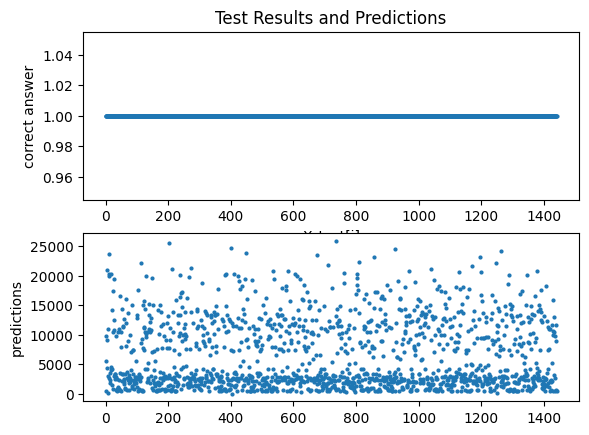

In [64]:
show_plots(df["runtime"],df["timestep"])

<Axes: xlabel='runtime', ylabel='Count'>

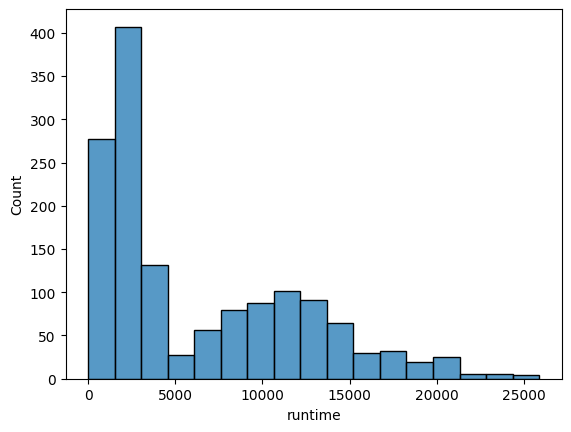

In [65]:
sns.histplot(df["runtime"])

In [66]:
for i in [100, 2000, 3300, 11000, 26000]:
    print(f"{i} = {convert(i)}")
df.describe()

100 = a minute
2000 = 33 minutes
3300 = 55 minutes
11000 = 3 hours
26000 = 7 hours


,runtime,sim_time,surface_moisture,timestep,wind_direction,wind_speed,canopy_moisture,run_max_mem_rss_bytes,area,steps_fire
count,1442.000000,1442.000000,1442.000000,1442.0,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.0
mean,6396.604022,0.103108,0.400160,1.0,0.459015,0.154201,0.741823,0.087422,0.098965,1.0
std,5750.241251,0.067780,0.201488,0.0,0.222123,0.121748,0.167932,0.055161,0.095449,0.0
min,10.000000,0.041846,0.000000,1.0,0.000000,0.000000,0.250000,0.000000,0.000000,1.0
25%,1935.000000,0.050966,0.272727,1.0,0.305913,0.051458,0.750000,0.045511,0.061078,1.0
50%,3307.000000,0.076433,0.303030,1.0,0.383033,0.144583,0.750000,0.100226,0.061357,1.0
75%,10958.250000,0.128999,0.606061,1.0,0.652956,0.237708,0.833333,0.109813,0.091384,1.0
max,25866.000000,0.309009,0.909091,1.0,1.000000,0.583333,1.000000,0.248807,0.354496,1.0


In [120]:
CATEGORIES = [1935, 3307, 11000, 260000]


def categorize(seconds):
    global CATEGORIES
    for i in range(len(CATEGORIES)):
        if (seconds <= CATEGORIES[i]):
            return i

list = [2300, 5000, 14000]

In [121]:
runtime_categories = df.apply(lambda row: categorize(row["runtime"]), axis=1)
# df.insert(0, "runtime_ca", runtime_categories)
df["runtime_ca"] = runtime_categories
df.head()

,runtime_ca,runtime,sim_time,surface_moisture,timestep,wind_direction,wind_speed,canopy_moisture,run_max_mem_rss_bytes,area,steps_fire
0,2,5475,0.050966,0.303030,1.0,0.241645,0.051458,0.833333,0.074582,0.046235,1.0
1,2,9737,0.128999,0.151515,1.0,0.305913,0.144583,0.750000,0.100625,0.293084,1.0
2,0,501,0.044546,0.363636,1.0,0.768638,0.051458,0.791667,0.005656,0.011231,1.0
3,2,4325,0.055708,0.303030,1.0,0.426735,0.083333,0.916667,0.099840,0.131749,1.0
4,2,9008,0.170005,0.454545,1.0,1.000000,0.144583,0.833333,0.171107,0.061357,1.0


32 minutes 	 0
55 minutes 	 1
3 hours 	 2
3 days 	 3


runtime_ca
2    364
0    361
1    360
3    357
Name: count, dtype: int64

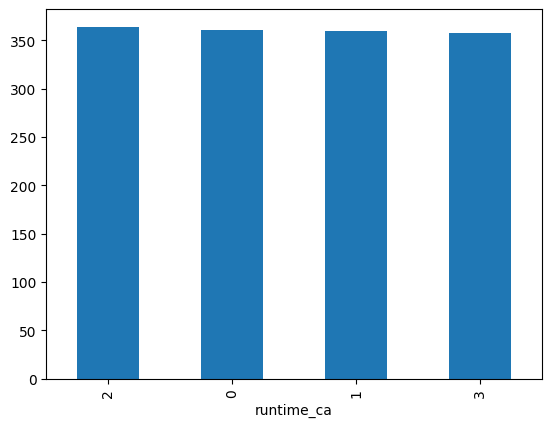

In [122]:
for i in range(len(CATEGORIES)):
    print(convert(CATEGORIES[i]),"\t",i)
df["runtime_ca"].value_counts().plot(kind="bar")
# df['colour'].value_counts().plot(kind='bar')
df["runtime_ca"].value_counts()
